
## Project:Medical Representative

Medical representatives are the key point of contact between
pharmaceutical and medical companies and healthcare professionals.
A medical representative's job is to promote and sell their company's
products, whether that's pharmaceutical drugs or medical equipment.
Customers can include doctors, nurses and pharmacists. The medical
representative will increase product awareness, answer queries,
company.

The job of medical representative has a lot of challenges but the most
important one is how the medical representative convinces a doctor to write a
drug from the medical company which he works for in his prescription where
there are many competitors' drugs that have the same active ingredient from
other companies.
The goal is to know if a doctor with some
specific features will write or not one of 6 drugs for a medical
company that has license to produce several types of local produced
drugs with the same active ingredients of multinational original drugs.

## Exploring the Data
In this part i'm going to explore the data and all the features.

### Datasets and Inputs
The dataset was collected by me in a year from private clinics,
hospitals and pharmacies
All data are public data that was collected from doctors and
pharmacists about 6 drugs produced by a certain medical company.


# First Stage: Data Collection

In [46]:
import numpy as np
import pandas as pd
from IPython.display import display     # Allows the use of display() for DataFrames
import sqlite3
import seaborn as sb
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline
%load_ext sql

con = sqlite3.connect("med.db")
cur = con.cursor()
%sql sqlite:///med.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a data base file
named 'med' attached with the project proposal.
the data in database called med and splited in two tables connected by the id column.
#### table 1 : medicine_table
* **id_m:** row id for every medicine
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.

#### table 2 : doctor_table
* **id_dr:** row id for every doctor
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0) if not.

In [47]:
medicine_table = %sql SELECT * FROM medicine_table;
medicine_table = medicine_table.DataFrame()
display(medicine_table.head())

 * sqlite:///med.db
Done.


,id_m,medicine,price
0,1,type1,45
1,2,type4,36
2,3,type1,45
3,4,type1,45
4,5,type5,29


In [48]:
doctor_table = %sql SELECT * FROM doctor_table ;
doctor_table = doctor_table.DataFrame()
display(doctor_table.head())

 * sqlite:///med.db
Done.


,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,area1,chest,a,200,clinic,1
1,2,area2,im,b,100,clinic,1
2,3,area8,chest,a,75,hospital,1
3,4,area5,chest,a,30,hospital,1
4,5,area6,uro,a,220,clinic,0


In [49]:
data = pd.concat([doctor_table, medicine_table], axis=1, ignore_index=False)
write_col = data.pop('write')
data['write'] = write_col
data.head()

,id_dr,area,speciality,dr_class,exam_price,clinic_hos,id_m,medicine,price,write
0,1,area1,chest,a,200,clinic,1,type1,45,1
1,2,area2,im,b,100,clinic,2,type4,36,1
2,3,area8,chest,a,75,hospital,3,type1,45,1
3,4,area5,chest,a,30,hospital,4,type1,45,1
4,5,area6,uro,a,220,clinic,5,type5,29,0


## Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of doctors who wrote any of the 6 drugs in their prescription. In the code cell below, i will compute the following:

The total number of records, 'n_records'

The number of doctors who wrote any of the 6 drugs in their prescription, 'n_doctor_who_write'.

The number of doctors who didn't write any of the 6 drugs in their prescription, 'n_doctor_who_not_write'.

The percentage of doctors who wrote any of the 6 drugs in their prescription, 'write_percent'.

# Second Stage: Data Exploration

In [50]:
data.describe()

,id_dr,exam_price,id_m,price,write
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,121.205128,195.500000,35.715385,0.587179
std,112.727548,86.729844,112.727548,8.751263,0.492974
min,1.000000,30.000000,1.000000,20.000000,0.000000
25%,98.250000,50.000000,98.250000,29.000000,0.000000
50%,195.500000,80.000000,195.500000,36.000000,1.000000
75%,292.750000,170.000000,292.750000,45.000000,1.000000
max,390.000000,350.000000,390.000000,45.000000,1.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
id_dr         390 non-null int64
area          390 non-null object
speciality    390 non-null object
dr_class      390 non-null object
exam_price    390 non-null int64
clinic_hos    390 non-null object
id_m          390 non-null int64
medicine      390 non-null object
price         390 non-null int64
write         390 non-null int64
dtypes: int64(5), object(5)
memory usage: 30.5+ KB


In [52]:
print("The total number of records is:", data.shape[0])
print("The number of doctors who wrote any of the 6 drugs in their prescription:", data[data['write']==1].shape[0])
print("The number of doctors who didn't write any of the 6 drugs in their prescription:", data[data['write']==0].shape[0])
print("The percentage of doctors who wrote any of the 6 drugs in their prescription:", (data[data['write']==1].shape[0]/data.shape[0])*100, "%")

The total number of records is: 390
The number of doctors who wrote any of the 6 drugs in their prescription: 229
The number of doctors who didn't write any of the 6 drugs in their prescription: 161
The percentage of doctors who wrote any of the 6 drugs in their prescription: 58.71794871794872 %


# Third Stage: Data Cleaning

### The dataset does not have null values

### Check for duplicated data

In [53]:
data.duplicated().value_counts()

False    390
dtype: int64

### The dataset does not have duplicated data

In [54]:
data.drop_duplicates(inplace=True)
data.shape

(390, 10)

### Remove 'id_dr' and 'id_m' columns as they are the same and meaningless for the dataset

In [55]:
data.drop(['id_dr', 'id_m'], axis=1, inplace=True)
data.head()

,area,speciality,dr_class,exam_price,clinic_hos,medicine,price,write
0,area1,chest,a,200,clinic,type1,45,1
1,area2,im,b,100,clinic,type4,36,1
2,area8,chest,a,75,hospital,type1,45,1
3,area5,chest,a,30,hospital,type1,45,1
4,area6,uro,a,220,clinic,type5,29,0


# Fourth stage: Date Analysis

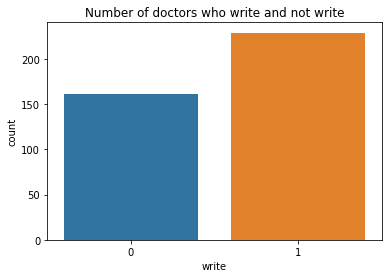

In [56]:
sb.countplot(data=data, x='write');
plt.title("Number of doctors who write and not write");

# This graph shows that:
Number of doctors who prescripe the company's medicines for thier patients are more than who do not prescripe.

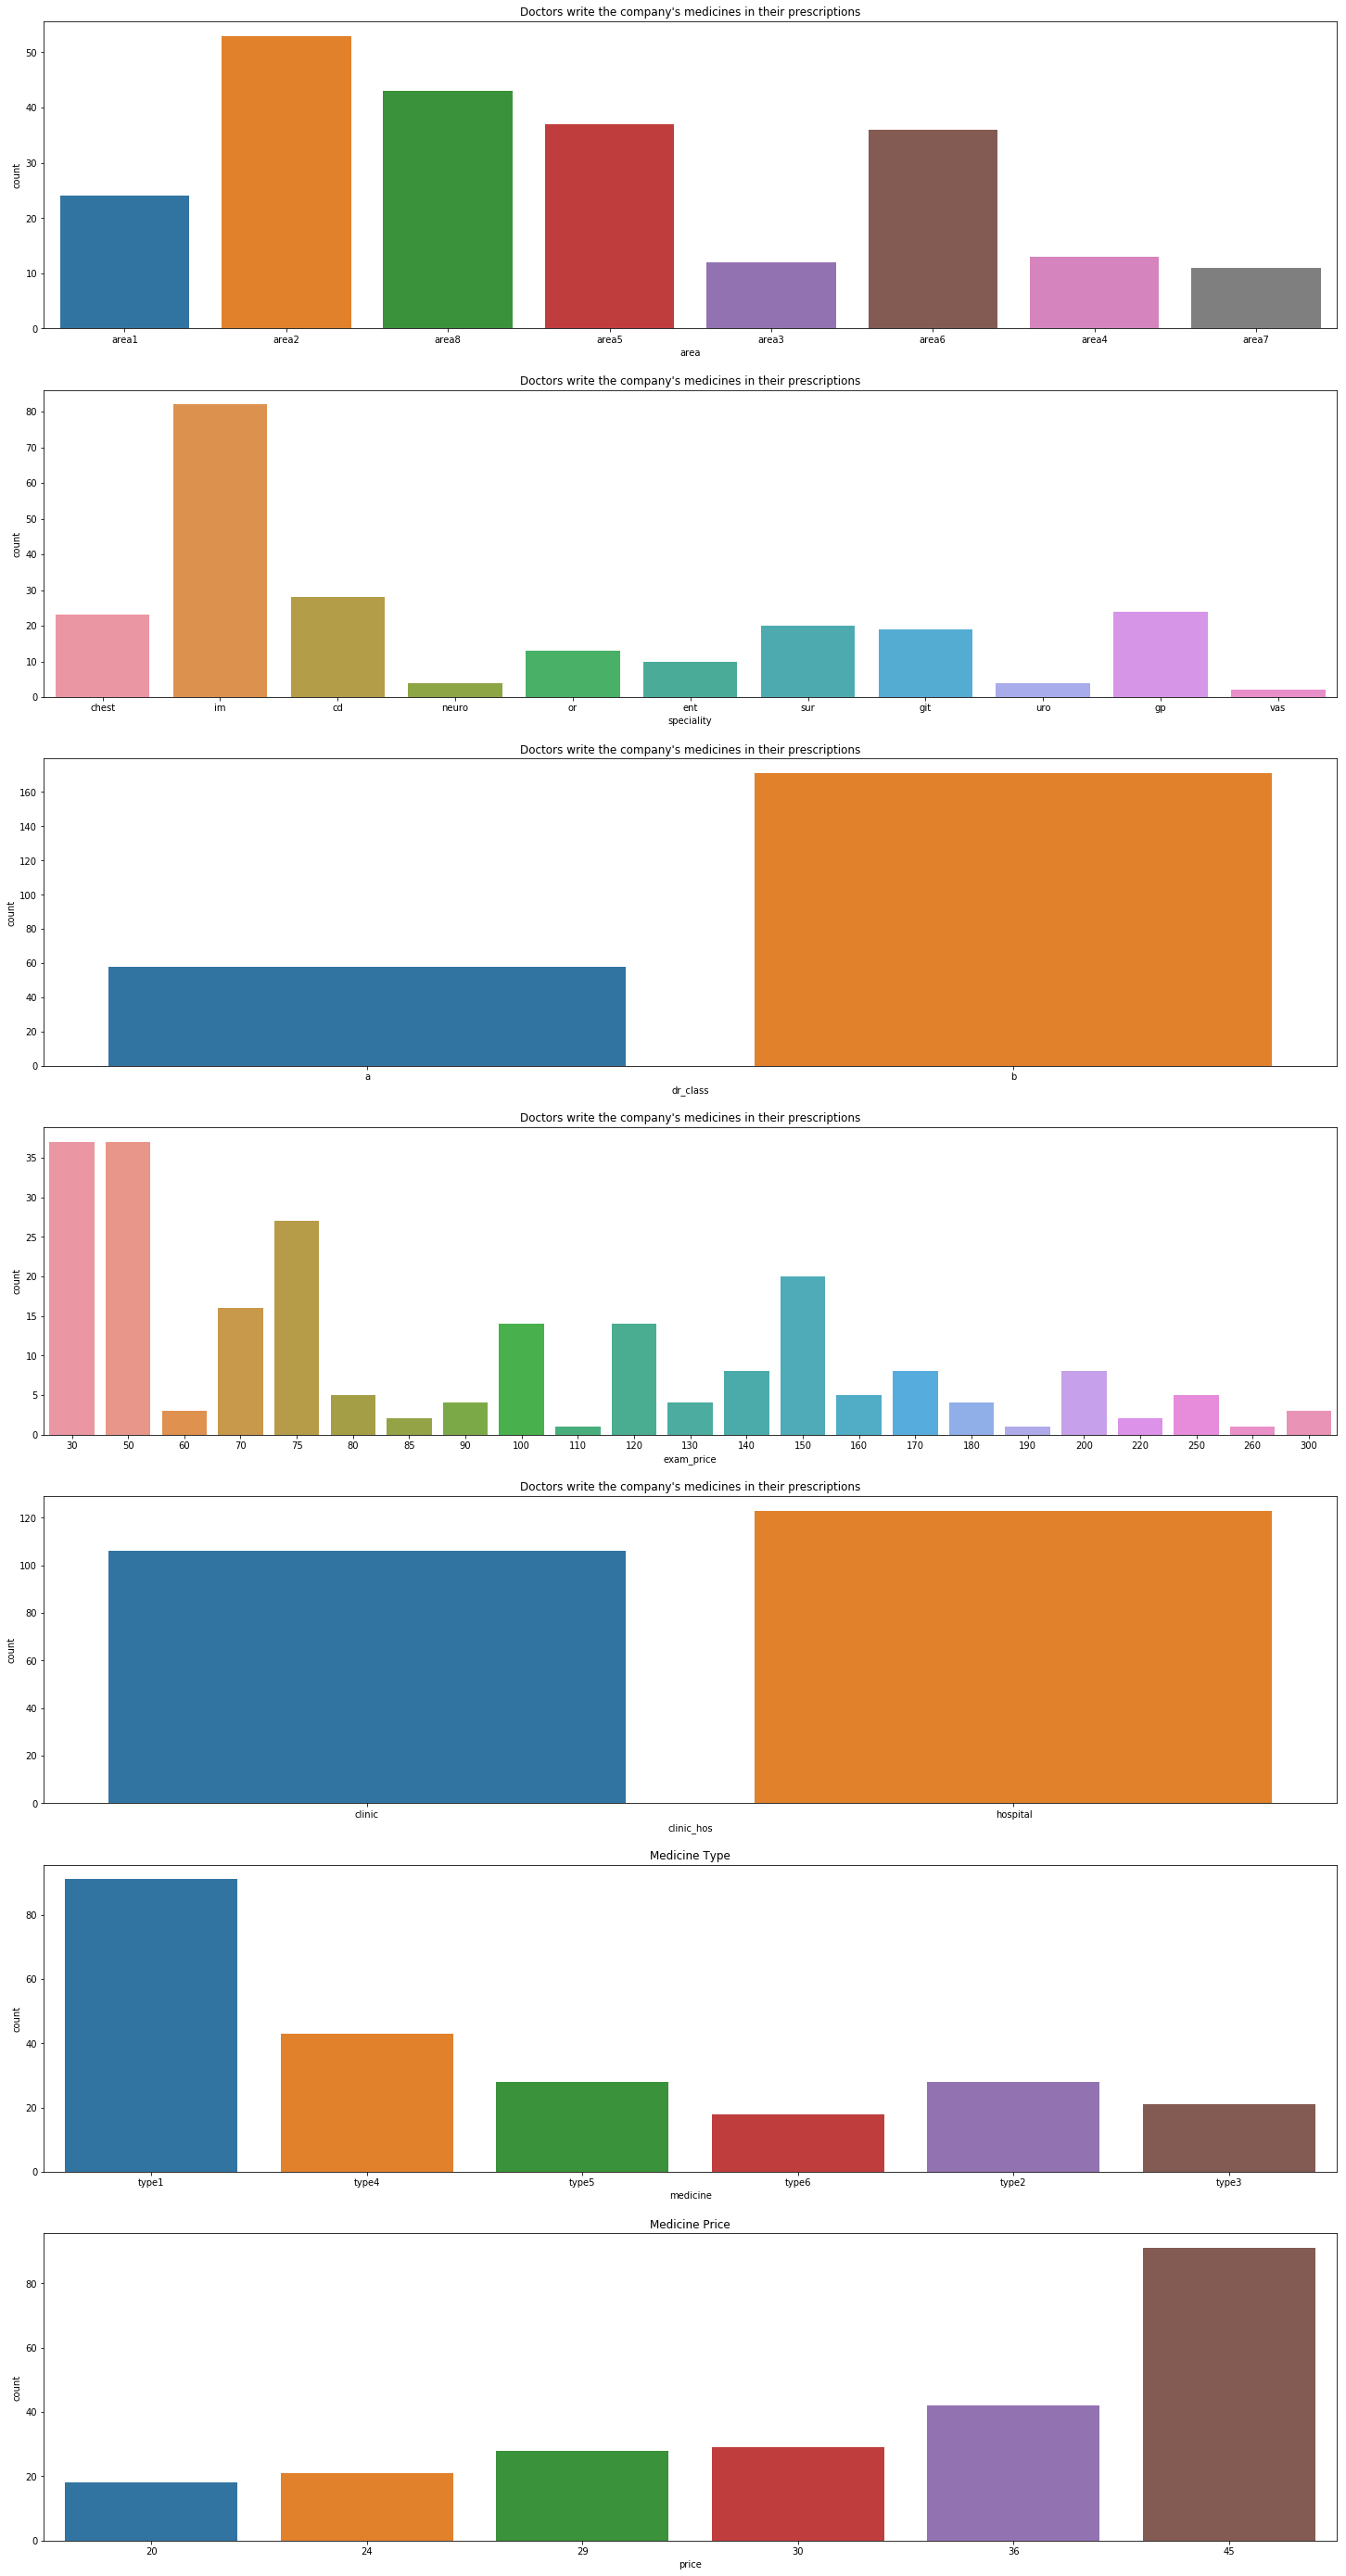

In [63]:
plt.figure(figsize=[25, 50])
doctors_write = data[data['write'] == 1].copy()
for i in range(data.shape[1]-1):
    plt.subplot(data.shape[1] - 1, 1, i+1)
    sb.countplot(data=doctors_write, x=data.columns[i])
    plt.xlabel(f"{data.columns[i]}"); plt.ylabel("count")
    if(i == 5):
        plt.title("Medicine Type")
    elif(i == 6):
        plt.title("Medicine Price")
    else:
        plt.title("Doctors write the company's medicines in their prescriptions")

# The previous graphs shows that:
1- Doctors in 'area2' are the most ones who prescribe the company's medicines for their patients, followed by 'area8' then 'area5'.

2- Doctors whose specialization is 'im' (internal medicine specialist) are the most ones who prescribe the company's medicines for their patients.

3- Doctors with class 'b' are the most ones who prescribe the company's medicines for their patients.

4- Doctors whose examination price is '30' or '50' are the most ones who prescribe the company's medicines for their patients, followed by '75'.
 
**which means that doctors with cheapest examination price are the most ones who prescribe the company's medicines for their patients**.

5- Doctors who work at hospitals are little bit more than doctors who work at clinics in prescriping the company's medicines for their patients.

6- Medicine of 'type1' are the most written in the doctors prescriptions for patients.

7- Medicine of price '45' pounds (which is of 'type1') are the most written in the doctors prescriptions for patients.

**Which means that the most expensive medicine between all company's medicine is the most written in the doctors prescriptions for patients**.

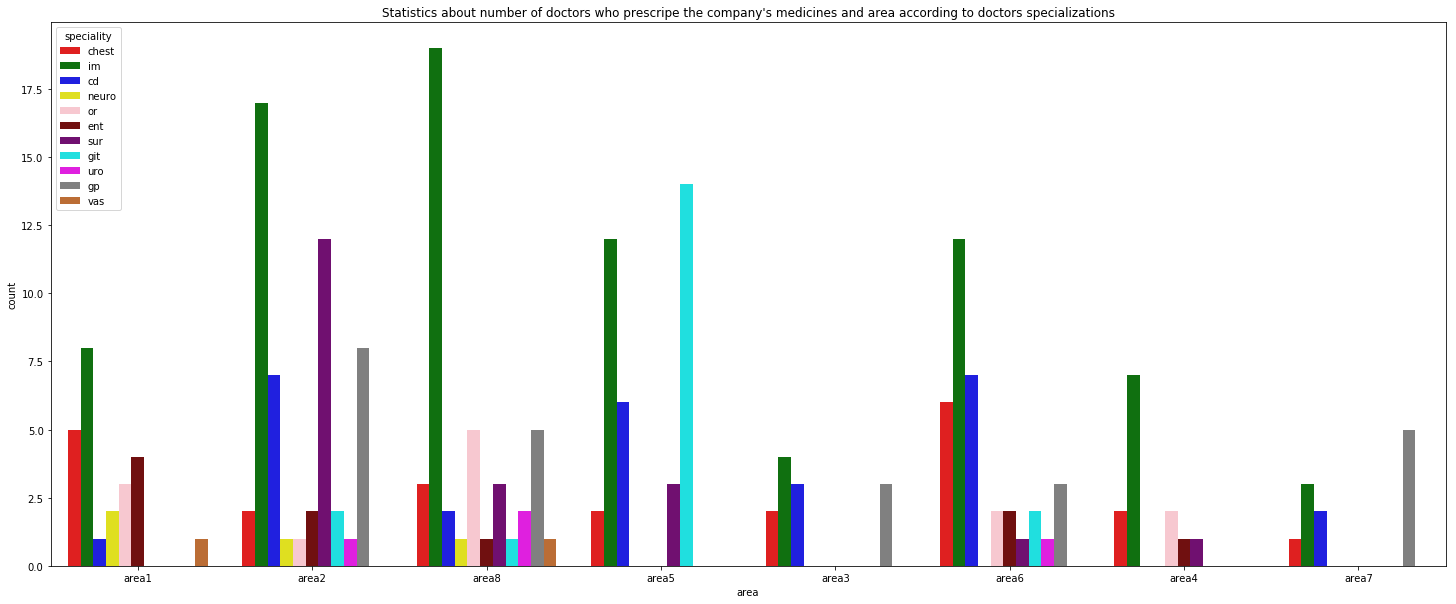

In [99]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors who prescripe the company's medicines and area according to doctors specializations")
sb.countplot(data=doctors_write, x='area', hue='speciality', palette=['red', 'green', 'blue', 'yellow', 'pink', 'maroon', 'purple', 'cyan', 'magenta', 'gray', 'chocolate'])

# This graph shows statistics that relate the number of doctors who write company's medicines in each area according to the speciality, and we find that:
1- At 'area1', 'area2', 'area3', 'area4', 'area6', and 'area8', docotrs who are specialists at 'im' are the most ones who write the company's medicines in their prescriptions for their patients.

**Which means that the company's medicines at 'im' (internal medicine specialist) specialization are the most effective between the other medicines**.

2- In 'area5', docotrs who are specialists at 'git' (gastrointestinal tract specialist) are the most ones who write the company's medicines in their prescriptions for their patients.

3- In 'area7', docotrs who are specialists at 'gp' (general practitioner) are the most ones who write the company's medicines in their prescriptions for their patients.

4- Docotrs who are specialists at 'vas' (vascular specialst) are the least ones between doctors who write the company's medicines in their prescriptions for their patients.

**Which means that the company's medicines at 'vas' specialization are not effective enough**.

Text(0.5,0,'Medicine Type')

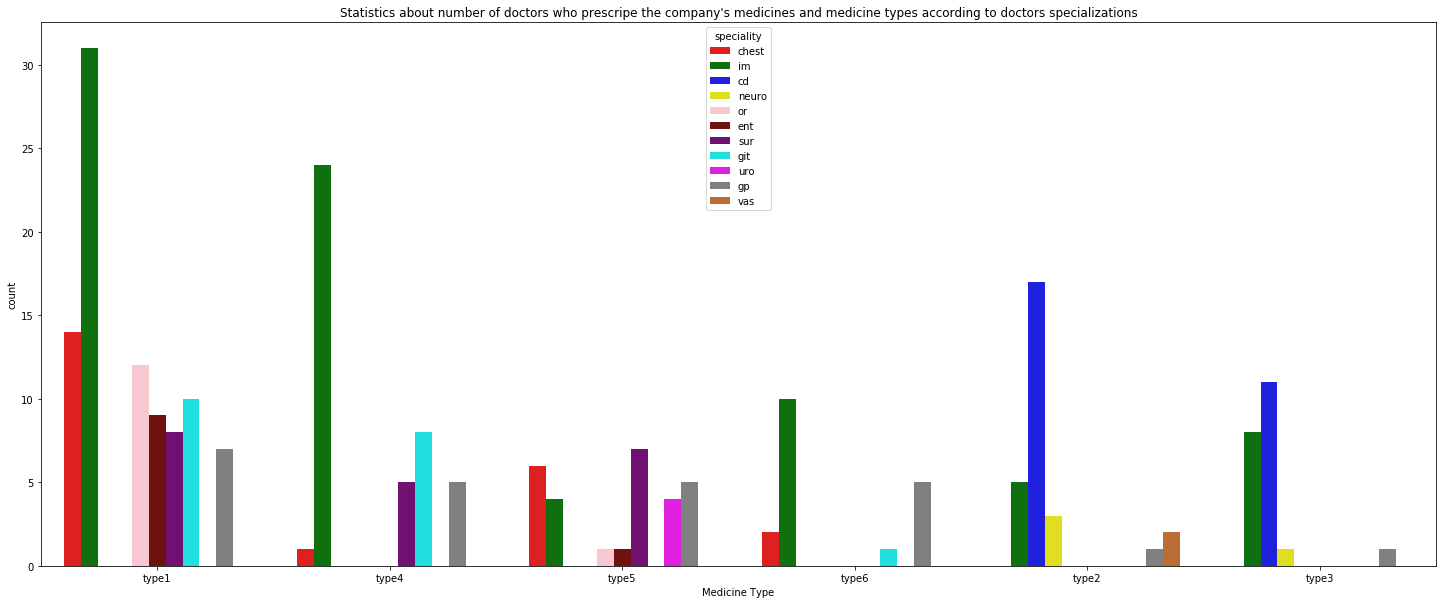

In [104]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors who prescripe the company's medicines and medicine types according to doctors specializations");
sb.countplot(data=doctors_write, x='medicine', hue='speciality', palette=['red', 'green', 'blue', 'yellow', 'pink', 'maroon', 'purple', 'cyan', 'magenta', 'gray', 'chocolate'])
plt.xlabel("Medicine Type")

# This graphs shows that:
1- Medicines of 'type1', 'type4', and 'type6' are mostly written by doctors who are specialists at 'im' (internal medicine specialist)

**Which means that for this type of medical deseases medicine of 'type1' is the most written by doctors between all the company's medicines**.

2- Medicine of 'type5' is the most written by doctors who are specialists at 'sur' (surgery specialist), followed by 'chest' specialists

3- Medicines of 'type2' and 'type3' are the most written by doctors who are specialists at 'cd' (cardiology specialist), followed by 'im' specialists

c:\ProgramData\anaconda3\envs\Abdo_Halem\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


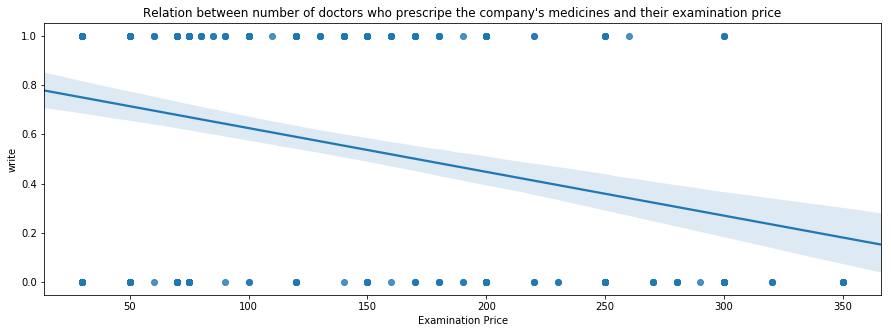

In [107]:
plt.figure(figsize=[15,5])
sb.regplot(data=data, x='exam_price', y='write')
plt.title("Relation between number of doctors who prescripe the company's medicines and their examination price");
plt.xlabel("Examination Price");

# This graphs shows the linear relation between number of doctors who prescripe the company's medicines and their examination price, and shows that:
The higher the examination price, the fewer the number of doctors prescriping the company's medicines, as it has a negative slope.

In [113]:
print("Correlation between 'prescriping the medicines' and 'examination price':", data['exam_price'].corr(data['write']))

Correlation between 'prescriping the medicines' and 'examination price': -0.31210961197240983


### The correlation means that this inverse relation is a weak relation

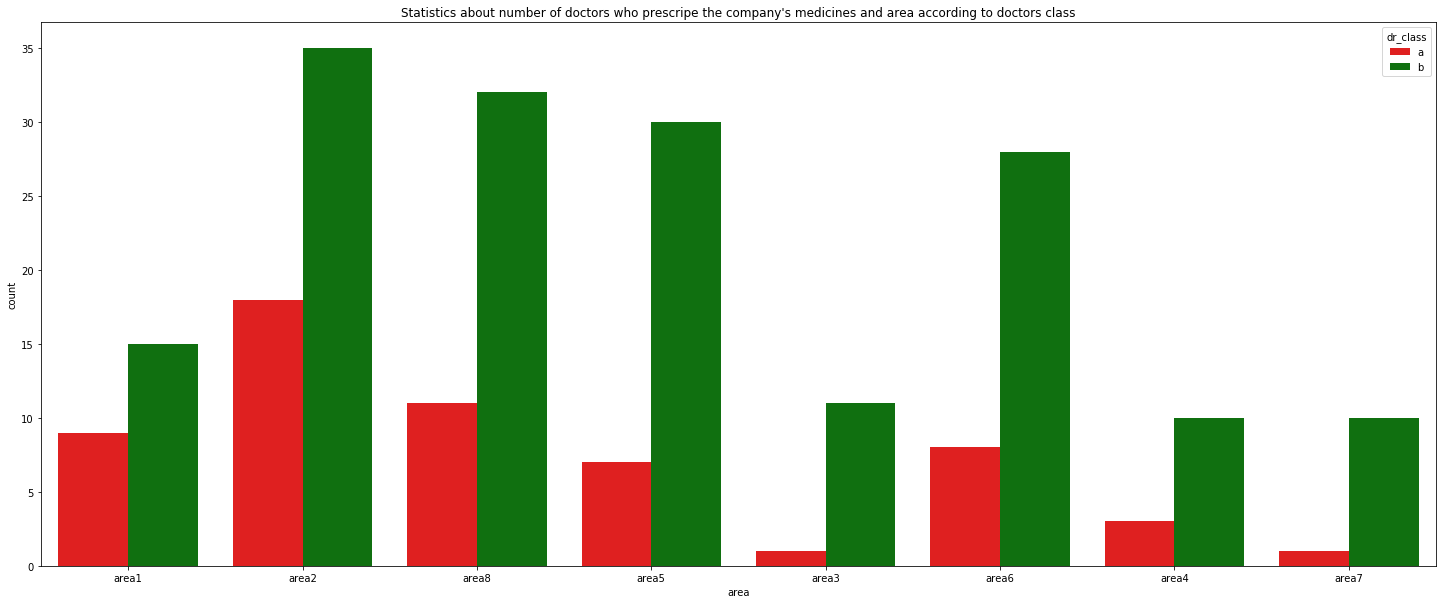

In [115]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors who prescripe the company's medicines and area according to doctors class")
sb.countplot(data=doctors_write, x='area', hue='dr_class', palette=['red', 'green'])

### This bar chart shows that doctors of class 'b' are the most ones who prescripe the company's medicines for their patients at all areas
**Which means that young doctos or doctors who are at the beginning of their career are more expected to prescripe the company's medicine than famous or expert doctors**.

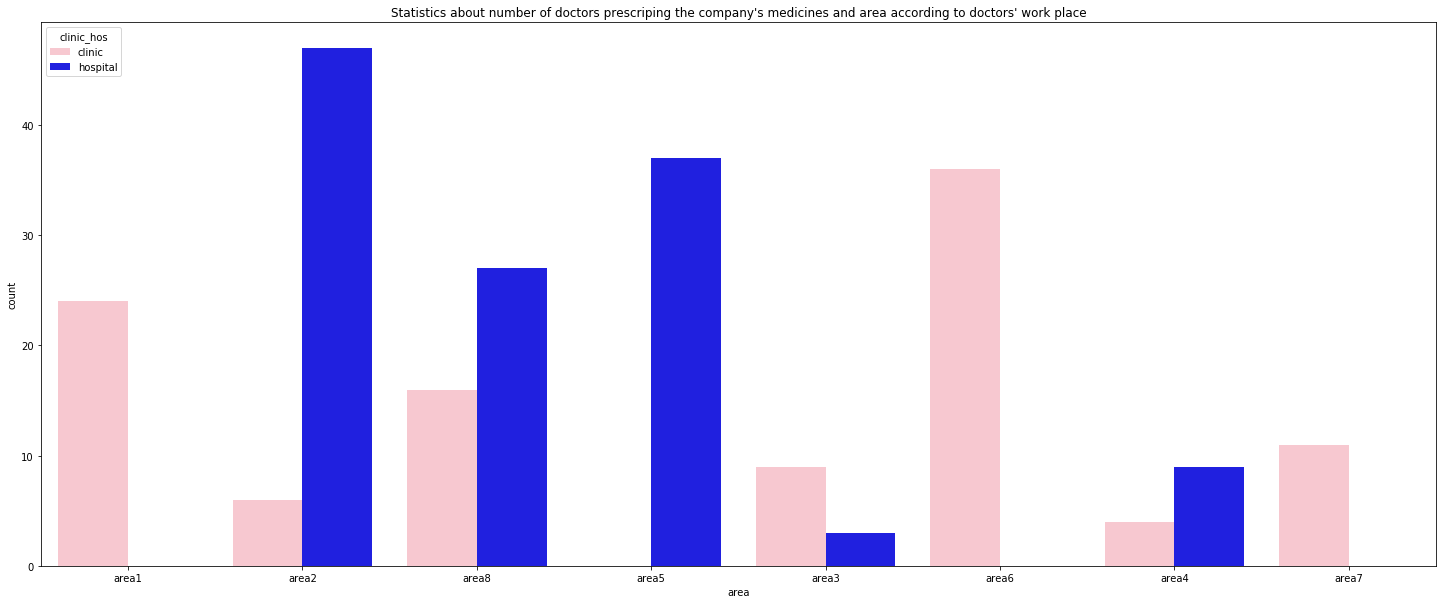

In [117]:
plt.figure(figsize=[25,10])
plt.title("Statistics about number of doctors prescriping the company's medicines and area according to doctors' work place")
sb.countplot(data=doctors_write, x='area', hue='clinic_hos', palette=['pink', 'blue']);

# This bar chart shows that:
1- At 'area1', 'area6', 'area7', and 'area6', all the doctors who prescripe the company's medicine for their patients work at clinics, except 'area6' there is a small number of doctors who prescripe the company's medicines.

**Which means that doctors who work at hospital in these 3 areas are not expected to prescripe the medicines**.

2- Doctors at 'area2', 'area4', 'area5', and 'area8' and work at hospitals, are the most ones who prescriping the company's medicine for their patients.